# Sample Image

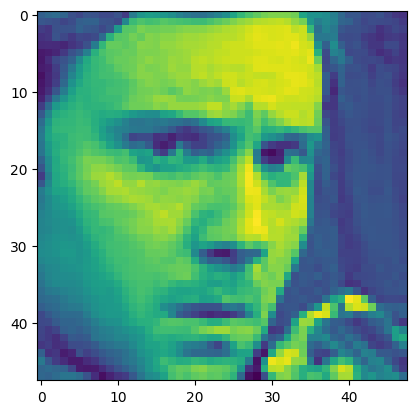

In [10]:
import numpy
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d
from PIL.ImageFilter import GaussianBlur


im = Image.open("sample/0.jpg").convert("L")
plt.figure()
plt.imshow(numpy.array(im))

# Now we explain How ULBPH captures facial data.

1. Edges in images are high chage in pixel values in one direction relative to the current pixel.

2. Below diagram explains how LBP captures textures of data.

![alt text](sample/How.jpg)

# Uniform Local Binary Pattern Histogram

1. The operator labels the pixels of an image by thresholding the 3x3-neighbourhood of each pixel with the center value and considering the result as a binary number.

2. Then the histogram of the labels can be used as a texture descriptor.

3.  A Local Binary Pattern is called uniform if it contains at most two bitwise transitions from 0 to 1 or vice versa.

4. In total there are 93 such numbers in range [0, 256] given by get ubins() function.

5. We split the given image into 9 tiles of 16 x 16 size.

6. Each tile gets a histogram of its's own.

7. Finally the feature vector is of size 837.

8. We can see that we reduced the FV size from 2500 to 837.

Text(0.5, 1.0, 'Histogram obtained from ULBPH algorithm')

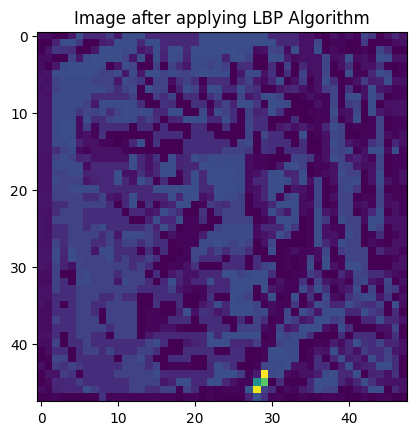

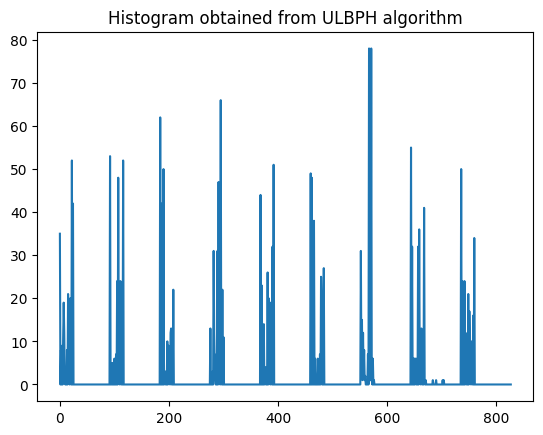

In [11]:
def _split_mat(arr: numpy.ndarray, blk_size: int = 16):
    l = numpy.split(arr, list(range(blk_size,arr.shape[0],blk_size)))
    split = []
    for x in l:
        tmp = numpy.split(x, list(range(blk_size,arr.shape[0],blk_size)), axis=1)
        for y in tmp:
            split.append(y)
    return split
# bin(4)
def get_ubins():
    bins = []
    for i in range(256):
        bin_form = bin(i)
        bin_form = bin_form[2:]
        trns = 0
        #while len(bin_form) <= 8:
         #  bin_form = '0' + bin_form
        curr = bin_form[0]
        prev = bin_form[0]
        for x in bin_form:
            prev = curr
            curr = x
            if curr != prev:
                trns +=1
        if trns <= 2:
            bins.append(i)
    return bins

bins = get_ubins()

def _lbph_algorithm(path: str, ubins: list):
    im = Image.open(path).convert("L")
    im = numpy.array(im)
    min_indx = 0
    max_indx = im.shape[0]
    im.setflags(write=True)

    for i in range(max_indx):
        for j in range(max_indx):

            lbp = ''

            if (i-1) > min_indx and (j-1) > min_indx:
                if im[i][j] >= im[i-1][j-1]:
                    lbp += '0'
                else:
                    lbp += '1'

            if (i-1) > min_indx and (j) < max_indx:
                if im[i][j] >= im[i-1][j]:
                    lbp += '0'
                else:
                    lbp += '1'

            if (i-1) > min_indx and (j+1) < max_indx:
                if im[i][j] >= im[i-1][j+1]:
                    lbp += '0'
                else:
                    lbp += '1'

            if (i) < max_indx and (j+1) < max_indx:
                if im[i][j] >= im[i][j+1]:
                    lbp += '0'
                else:
                    lbp += '1'

            if (i+1) < max_indx and (j+1) < max_indx:
                if im[i][j] >= im[i+1][j+1]:
                    lbp += '0'
                else:
                    lbp += '1'

            if (i+1) < max_indx and (j) < max_indx:
                if im[i][j] >= im[i+1][j]:
                    lbp += '0'
                else:
                    lbp += '1'
            
            if (i+1) < max_indx and (j-1) > min_indx:
                if im[i][j] >= im[i+1][j-1]:
                    lbp += '0'
                else:
                    lbp += '1'

            if (i) < max_indx and (j-1) > min_indx:
                if im[i][j] >= im[i][j-1]:
                    lbp += '0'
                else:
                    lbp += '1'

            im[i][j] = int(lbp,2)
    
    tiles = []

    tiles = _split_mat(im)
    
    hist = []

    for tile in tiles:
        o = numpy.histogram(tile, ubins)
        hist.append(o[0])

    hist = numpy.concatenate(hist)

    return im , hist

im, hist = _lbph_algorithm("sample/0.jpg", bins)

plt.figure()
plt.imshow(im)
plt.title('Image after applying LBP Algorithm')
plt.savefig('sample/result')

plt.figure()
plt.plot(hist)
plt.title("Histogram obtained from ULBPH algorithm")